<a href="https://colab.research.google.com/github/nicolasero87/Homicidios_dolosos_Argentina/blob/main/Primer_entregable_Ds2_Nicolas_Roman_Homicidios_en_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primer Entregable
#**Fundamento Ciencias de datos II**

---


###Alumno: Nicolas Román
####Comision 61785

###Prof.: David Silvera
###Tutor: ????

#####Sitio Web Oficial usado como fuente: [Argentina.gob.ar](https://www.argentina.gob.ar/seguridad/estadisticascriminales/bases-de-datos)

#####Data Base:  [Sistema de Alerta Temprana Homicidios Dolosos 2017-2023](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/SAT-HD-BU_2017-2023.csv)

#####Abril 2025


#Consigna


---


##Para la Pre-Entrega
####Objetivos generales

Obtener datos de diversas fuentes como APIs o Bases de datos públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar una pregunta de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos

####Objetivos específicos

Estructurar un problema en función de múltiples pero simples preguntas/hipótesis a responder

Importar datos crudos de APIs o bases de datos usando Python

Limpiar y transformar los datos para permitir un posterior análisis

Contar una historia mediante el análisis exploratorio de datos

---


## Requisitos Base

* Un notebook (Colab o Jupyter) que debe contener:
1.Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podrá beneficiar de este análisis

2.Preguntas/hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos. Bloques de código donde se importan los datos desde una API o base de datos pública y los guarda en un archivo local csv o json. El estudiante puede luego de descargar los datos, comentar este bloque de código

3.Análisis exploratorio de datos (EDA): Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas
Formato:

* Una presentación (PDF; PowerPoint o Google Slides) que debe contener

1.Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podrá beneficiar de este análisis

2.Resumen de metadata: resumen de los datos a ser analizados es decir, número de filas/columnas, tipos de variables, etc

3.Preguntas hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos

4.Visualizaciones ejecutivas que responden nuestras preguntas: utilización de gráficos que responden las preguntas de interés de nuestro proyecto.

5.Insights: resumen de hallazgos del proyecto. Aquí consolidamos las respuestas a las preguntas/hipótesis que fuimos contestando con las visualizaciones

##Requisitos extra

* Subir el proyecto a Github

#Importacion de librerias y conexión a la carpeta de GitHub

In [20]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from bokeh.io import output_notebook, show, reset_output
from bokeh.plotting import figure
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy import stats


In [21]:
! git clone https://github.com/nicolasero87/Homicidios_dolosos_Argentina.git

fatal: destination path 'Homicidios_dolosos_Argentina' already exists and is not an empty directory.


# Data Set: *Sistema de Alerta Temprana- Homicicios Dolosos- Argentina 2017-2023*

##Abstracto
documento: **SAT-HD-BU_2017-2023**. El mismo fue importado en formato *.csv

Sitio Web Oficial usado como fuente: [Argentina.gob.ar](https://datos.gob.ar/apis)

Data Base:  [Sist. Al. temp. Homicidios Dolosos](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/SAT-HD-BU_2017-2023.csv)

El Ministerio de Seguridad de la Nación, a través de la Dirección Nacional de Estadística Criminal, pone a disposición los registros administrativos del Sistema de Alerta Temprana de Homicidios Dolosos (en adelante, SAT-HD) del Sistema Nacional de Información Criminal (SNIC).

De esta forma, a partir de la difusión y la mejora en el acceso a la información sobre la temática, se busca promover el desarrollo de nuevas investigaciones y contribuir al diseño de políticas públicas basadas en evidencia, además de promover la transparencia en la gestión, acorde a la Ley Nro. 27.275 de Derecho de Acceso a la Información Pública y Gobierno Abierto.

A partir de los microdatos de las bases SAT-HD es posible calcular la cantidad de víctimas y hechos de homicidios dolosos, identificar las características y los modos en los que suceden los hechos; así también releva información sobre las características de víctimas e inculpados/as. La base permite también identificar el vínculo entre víctima y victimario, conocer el contexto en el que sucede el hecho, entre otra información relevante.

La base de datos cuenta con un número identificador por cada hecho. En la misma base se incluyen los registros correspondientes a todas las víctimas y a todos los inculpados identificados en cada hecho.

La base de datos cuenta con un identificador del hecho, para cada uno de ellos se encuentran en la misma base los registros correspondientes a las víctimas y a los inculpados (uno/a por fila). Por lo tanto, las características de un mismo hecho se repiten para cada víctima y cada inculpado/a. Para calcular la cantidad de víctimas es necesario filtrar a los inculpados de la base de datos, es posible contabilizar la cantidad de víctimas e inculpados utilizando la variable “tipo_persona”.

El data set elegido se trata de un conjunto de datos (instancias) de 34.033 registros.
Cada homicidio (hecho) esta asociado a un ID el que se repite segun la dimension del análisis (victima o autor del homicidio).
Hay 47 atrinutos:

# OBJETIVOS

El presente proyecto tiene 2 objetivos:

1.  **Objetivo n° 1**: Analizar la base de Datos mediante un EDA. (primera parte del notebook)

2.   **Objetivo n° 2**: Intentar crear un algoritmo que prediga ..... (segunda parte del notebook)

In [22]:
print(response.text[:500])  # Muestra los primeros 500 caracteres

id_hecho;tipo_hecho_segun_victima;tipo_persona_id;tipo_persona;cant_inc;cant_vic;federal;provincia_id;provincia_nombre;departamento_id;departamento_nombre;localidad_id;localidad_nombre;radio_censal;latitud_radio;longitud_radio;anio;mes;fecha_hecho;hora_hecho;tipo_lugar;tipo_lugar_otro;tipo_lugar_ampliado;clase_arma;clase_arma_otro;en_ocasion_otro_delito;en_ocasion_otro_delito_otro;motivo_origen_registro;motivo_origen_registro_otro;victima_sexo;victima_identidad_genero;victima_identidad_genero_ot


In [23]:
import pandas as pd
import io
import requests

# Replace 'your_file_id' with the actual file ID from the Google Drive link
file_id = '1ugAXNrEZhNlIwjoziVrRrKY8_wxjGtCT'
url = f'https://docs.google.com/uc?export=download&id={file_id}'

# Download the CSV data
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(response.text), sep=';')

<ipython-input-23-2d3b4d099594>:14: DtypeWarning: Columns (11,21,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(response.text), sep=';')


In [24]:
#impresion de las primeras 5 filas del data set
df.head()

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inc,cant_vic,federal,provincia_id,provincia_nombre,departamento_id,...,victi_situacion_ocupacional_otro,victima_relacion_inculpado,inculpado_sexo,inculpado_identidad_genero,inculpado_identidad_genero_otro,inculpado_tr_edad,inculpado_18_años_o_mas,inculpado_clase,inculpado_otro_clase,inculpado_relacion_victima
0,11535,HD Varón,Víctima idRegistro 12235,Víctima,3,1,No,58,Neuquén,58035,...,NaN,Sin relación,No corresponde,No corresponde,-------,No corresponde,No corresponde,No corresponde,----,No corresponde
1,11535,HD Varón,Imputado idRegistro 12929,Imputado,3,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,Sin determinar,Sin determinar,Sin determinación,NaN,Sin relación
2,11535,HD Varón,Imputado idRegistro 12931,Imputado,3,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,Sin determinar,Sin determinar,Sin determinación,NaN,Sin relación
3,11535,HD Varón,Imputado idRegistro 12930,Imputado,3,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,Sin determinar,Sin determinar,Sin determinación,NaN,Sin relación
4,11536,HD Varón,Imputado idRegistro 12933,Imputado,2,1,No,58,Neuquén,58035,...,---------,No corresponde,Masculino,Varón,NaN,20-24,Sí,Civil,NaN,Sin relación


In [25]:
#tamaño del data set para saber si cumple con los requisitos exigidos ( al menos 2000 filas y al menos 15 columnas.)
df.shape


(34032, 47)

In [26]:
#metodo para describir las variables del data set y redondear los valores decimales a 2 cifras
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_hecho,34032.0,2.265328e+04,6.212749e+03,11535.0,17584.75,22559.5,27930.0,33828.0
cant_inc,34032.0,1.451634e+00,1.079573e+00,1.0,1.00,1.0,1.0,16.0
cant_vic,34032.0,1.063999e+00,3.171330e-01,1.0,1.00,1.0,1.0,6.0
provincia_id,34032.0,3.427069e+01,3.276732e+01,2.0,6.00,14.0,66.0,94.0
departamento_id,34032.0,3.464265e+04,3.850890e+04,2001.0,6427.00,14147.0,66126.0,2699926.0
radio_censal,29118.0,3.442179e+08,3.204514e+08,20010101.0,64279615.00,180210701.0,661260204.0,940140810.0
anio,34032.0,2.019917e+03,1.963732e+00,2017.0,2018.00,2020.0,2022.0,2023.0
mes,34032.0,6.455571e+00,3.563760e+00,1.0,3.00,6.0,10.0,12.0


In [27]:
df.describe(include='object').T

,count,unique,top,freq
tipo_hecho_segun_victima,34032,9,HD Varón,28222
tipo_persona_id,34032,34032,Víctima idRegistro 35945,1
tipo_persona,34032,2,Imputado,18510
federal,34032,2,No,34019
provincia_nombre,34032,24,Buenos Aires,13680
departamento_nombre,34032,396,Capital,3110
localidad_id,34032,104,10,8734
localidad_nombre,34032,1054,Rosario,2561
latitud_radio,29118,9156,"-32,9611241",50
longitud_radio,29118,9147,"-60,7406953",50


La descripción anterior nos anticipa que Buenos Aires es la provincia más repetida entre los hechos del data set.

In [28]:
#Identificar valores perdidos.
df.isnull().sum()

,0
id_hecho,0
tipo_hecho_segun_victima,0
tipo_persona_id,0
tipo_persona,0
cant_inc,0
cant_vic,0
federal,0
provincia_id,0
provincia_nombre,0
departamento_id,0


El resultado anterior es muy importante porque nos dice dónde hay valores nulos. Lo importante es indagar si los mismos aparecen dentro de atributos que serán objeto de análisis en éste trabajo.

# OBJETIVO n° 1

  

> Se busca analizar el contenido de la base de DATOS



en primer lugar hare un RENAME de algunas columnas para su mejor comprensión y un DELETE de las columnas que no sirven para mi EDA.

#detalle:
##Rename
QUIERO HACER UN RENAME DE LAS COLUMNAS DE MI DATA SET PARA QUE QUEDEN DEL SIGUIENTE MODO:

1 id_hecho

2	tipo_hecho_segun_victima

3	tipo_persona_id

4	tipo_persona

5	cant_inculpados

6	cant_victimas

7	federal

8	provincia_id

9	provincia_nombre

10	departamento_id

11	departamento_nombre

12	localidad_id

13	localidad_nombre

14	radio_censal

15	latitud_radio

16	longitud_radio

17	anio

18	mes

19	fecha_hecho


20	hora_hecho

21	tipo_lugar

22	tipo_lugar_otro

23	tipo_lugar_ampliado


24	clase_arma

25	clase_arma_otro

26	en_ocasion_otro_delito


27	en_ocasion_otro_delito_otro

28	motivo_origen_registro


29	motivo_origen_registro_otro

30	victima_sexo

31	victima_identidad_genero

32	victima_identidad_genero_otro


33	victima_tramo_edad

34	victima_18_años_o_mas

35	victima_clase

36	victima_clase_otro


37	victima_situacion_ocupacional

38	victi_situacion_ocupacional_otro

39	victima_relacion_inculpado

40	inculpado_sexo


41	inculpado_identidad_genero

42	inculpado_identidad_genero_otro

43	inculpado_tr_edad


44	inculpado_18_años_o_mas

45	inculpado_clase

46	inculpado_otro_clase

47	inculpado_relacion_victima.


##DROP de las siguientes columnas:

40	inculpado_sexo

41	inculpado_identidad_genero

42	inculpado_identidad_genero_otro

43	inculpado_tr_edad

44	inculpado_18_años_o_mas

45	inculpado_clase


46	inculpado_otro_clase

47	inculpado_relacion_victima.

##### Preguntas preliminares relativas al data set teniendo en cuenta el objetivo n°1:
interrogantes que surgen de la base de datos:
####1.¿hay alguna provincia que sobresalga de los restantes?
####2.¿qué informacion relevante se puede obtener de la base de datos, considerando los atributos bajo análisis?

##Planteo para el Objetivo n° 1
Usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Homicidios Dolosos en Argentina.

El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

Se busca analizar las variables más destacatas de la base de datos.

#Contexto analitíco
Explorar el data set Homicidios Dolosos en Argentina mediante la aplicacion de métodos y visualización a traves de distintas clases de gráficos que orienten el análisis y permitan la obtención de valiosos insights.

##EDA EXPLORATORY DATA ANALYSIS (ETA)

1. Atributos distinguidos (Analisis por Provincias, Top 5)
2. Análisis Univariados (características de los homicidios doloros en la Provincia que tenga mayor cantidad)
3. Analisis Bi/Multi Variados (relacion entre las variables ??? con '??' y '???')
4. Detectar valores aberrantes y datos perdidos
5. Detectar valores outliers

In [29]:
# Define the new column names
new_column_names = ['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id',
                    'tipo_persona', 'cant_inculpados', 'cant_victimas',
                    'federal', 'provincia_id', 'provincia_nombre',
                    'departamento_id', 'departamento_nombre', 'localidad_id',
                    'localidad_nombre', 'radio_censal', 'latitud_radio',
                    'longitud_radio', 'anio', 'mes', 'fecha_hecho',
                    'hora_hecho', 'tipo_lugar', 'tipo_lugar_otro',
                    'tipo_lugar_ampliado', 'clase_arma', 'clase_arma_otro',
                    'en_ocasion_otro_delito', 'en_ocasion_otro_delito_otro',
                    'motivo_origen_registro', 'motivo_origen_registro_otro',
                    'victima_sexo', 'victima_identidad_genero',
                    'victima_identidad_genero_otro', 'victima_tramo_edad',
                    'victima_18_años_o_mas', 'victima_clase',
                    'victima_clase_otro', 'victima_situacion_ocupacional',
                    'victi_situacion_ocupacional_otro',
                    'victima_relacion_inculpado', 'inculpado_sexo',
                    'inculpado_identidad_genero', 'inculpado_identidad_genero_otro',
                    'inculpado_tr_edad', 'inculpado_18_años_o_mas',
                    'inculpado_clase', 'inculpado_otro_clase',
                    'inculpado_relacion_victima']

# Rename the columns
df = df.rename(columns=dict(zip(df.columns, new_column_names)))

# Columns to drop
columns_to_drop = ['inculpado_sexo', 'inculpado_identidad_genero',
                   'inculpado_identidad_genero_otro', 'inculpado_tr_edad',
                   'inculpado_18_años_o_mas', 'inculpado_clase',
                   'inculpado_otro_clase', 'inculpado_relacion_victima']

# Create a new DataFrame without the unnecessary columns
df_cleaned = df.drop(columns=columns_to_drop)
df_2 = df_cleaned[df_cleaned['tipo_persona'] == "Víctima"]
#usar DataSet unicamente basado en VICTIMAS (dejando de lado la dimension de analisis Vicimario/Autor material/Inculpado)
df_2

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inculpados,cant_victimas,federal,provincia_id,provincia_nombre,departamento_id,...,victima_sexo,victima_identidad_genero,victima_identidad_genero_otro,victima_tramo_edad,victima_18_años_o_mas,victima_clase,victima_clase_otro,victima_situacion_ocupacional,victi_situacion_ocupacional_otro,victima_relacion_inculpado
0,11535,HD Varón,Víctima idRegistro 12235,Víctima,3,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,45-49,Sí,Civil,NaN,Empleado de otros sectores,NaN,Sin relación
6,11536,HD Varón,Víctima idRegistro 12236,Víctima,2,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,40-44,Sí,Civil,NaN,Empleado de otros sectores,NaN,Sin relación
7,11537,HD Varón,Víctima idRegistro 12237,Víctima,1,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Desocupado,NaN,Sin relación
10,11538,HD Varón,Víctima idRegistro 13009,Víctima,1,1,No,58,Neuquén,58091,...,Masculino,Varón,NaN,70-74,Sí,Civil,NaN,Desocupado,NaN,Padre/Madre
12,11539,HD Varón,Víctima idRegistro 12239,Víctima,1,1,No,58,Neuquén,58035,...,Masculino,Varón,NaN,15-19,No,Civil,NaN,Desocupado,NaN,Sin relación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34022,33821,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 35995,Víctima,1,1,No,6,Buenos Aires,6427,...,Femenino,Mujer,NaN,55-59,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34023,33822,HD Varón,Víctima idRegistro 35996,Víctima,1,1,No,6,Buenos Aires,6623,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Changarín,NaN,Hermano/a
34025,33823,HD Varón,Víctima idRegistro 35997,Víctima,2,1,No,6,Buenos Aires,6371,...,Masculino,Varón,NaN,Sin determinar,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34028,33827,HD Mujer Cis Trans Travesti-Femicidio,Víctima idRegistro 36001,Víctima,1,1,No,90,Tucumán,90084,...,Femenino,Mujer,NaN,40-44,Sí,Civil,NaN,No corresponde,NaN,Conyuge/ pareja


In [30]:
df_2.shape

(15522, 39)

In [31]:
#cuáles son las provincias con más cantidad de Homicidios Dolosos
pcia_counts = df_2['provincia_nombre'].value_counts()
print(pcia_counts)

provincia_nombre
Buenos Aires                       6223
Santa Fe                           2539
Tucumán                             814
Ciudad Autónoma de Buenos Aires     791
Córdoba                             769
Mendoza                             612
Salta                               505
Chaco                               464
Misiones                            374
Entre Ríos                          363
Chubut                              266
Santiago del Estero                 260
Corrientes                          255
Neuquén                             248
Formosa                             231
Río Negro                           191
Jujuy                               162
Santa Cruz                           97
San Juan                             91
San Luis                             87
Catamarca                            64
La Rioja                             48
La Pampa                             46
Tierra del Fuego                     22
Name: count, dtype: int

In [32]:
# Ahora quiero agrupar por provincia y por años
pcia_counts_by_year = df_2.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()

# Rename the count column for better understanding
pcia_counts_by_year = pcia_counts_by_year.rename(columns={'id_hecho': 'homicidios_dolosos'})

# Print the result
print(pcia_counts_by_year)

    provincia_nombre  anio  homicidios_dolosos
0       Buenos Aires  2017                 990
1       Buenos Aires  2018                 992
2       Buenos Aires  2019                 903
3       Buenos Aires  2020                 931
4       Buenos Aires  2021                 838
..               ...   ...                 ...
163          Tucumán  2019                 141
164          Tucumán  2020                 152
165          Tucumán  2021                 105
166          Tucumán  2022                  82
167          Tucumán  2023                  81

[168 rows x 3 columns]


In [33]:
#Siendo Buenos Aires la provincia que más homicidios ha tenido en los años 2017-2023,
#pasaremos a focalizarnos en las características del delito de Homicidio Doloso en dicha jurisdiccion
#primero creare un nuevo df donde unicamente aquellos registros en los que 'provincia_nombre' == Buenos Aires y 'tipo-_persona' == 'Víctima'. y se llame df_BA

df_BA = df_2[(df_2['provincia_nombre'] == 'Buenos Aires') & (df_2['tipo_persona'] == 'Víctima')]
df_BA

,id_hecho,tipo_hecho_segun_victima,tipo_persona_id,tipo_persona,cant_inculpados,cant_victimas,federal,provincia_id,provincia_nombre,departamento_id,...,victima_sexo,victima_identidad_genero,victima_identidad_genero_otro,victima_tramo_edad,victima_18_años_o_mas,victima_clase,victima_clase_otro,victima_situacion_ocupacional,victi_situacion_ocupacional_otro,victima_relacion_inculpado
3462,14097,HD Varón,Víctima idRegistro 14852,Víctima,1,1,No,6,Buenos Aires,6410,...,Masculino,Varón,NaN,35-39,Sí,Civil,NaN,Sin Determinar,NaN,Sin relación
3465,14098,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 14853,Víctima,1,2,No,6,Buenos Aires,6427,...,Masculino,Varón,NaN,20-24,Sí,Sin determinación,NaN,Sin Determinar,NaN,Sin determinación
3466,14098,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 14854,Víctima,1,2,No,6,Buenos Aires,6427,...,Femenino,Mujer,NaN,25-29,Sí,Sin determinación,NaN,Sin Determinar,NaN,Sin determinación
3468,14099,HD Varón,Víctima idRegistro 14855,Víctima,1,1,No,6,Buenos Aires,6441,...,Masculino,Varón,NaN,30-34,Sí,Civil,NaN,Sin Determinar,NaN,Sin relación
3469,14100,HD Varón,Víctima idRegistro 14856,Víctima,1,1,No,6,Buenos Aires,6875,...,Masculino,Varón,NaN,45-49,Sí,Civil,NaN,Sin Determinar,NaN,Hermano/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34018,33769,HD Mujer Cis Trans Travesti-Femicidio,Víctima idRegistro 35944,Víctima,3,3,No,6,Buenos Aires,6882,...,Femenino,Mujer,NaN,10-14,No,Civil,NaN,No corresponde - Menor,NaN,Otros vínculos familiares
34019,33820,HD Varón,Víctima idRegistro 35994,Víctima,1,1,No,6,Buenos Aires,6490,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34022,33821,HD Mujer Cis Trans Travesti-Otro homicidio,Víctima idRegistro 35995,Víctima,1,1,No,6,Buenos Aires,6427,...,Femenino,Mujer,NaN,55-59,Sí,Civil,NaN,No corresponde,NaN,Sin relación
34023,33822,HD Varón,Víctima idRegistro 35996,Víctima,1,1,No,6,Buenos Aires,6623,...,Masculino,Varón,NaN,25-29,Sí,Civil,NaN,Changarín,NaN,Hermano/a


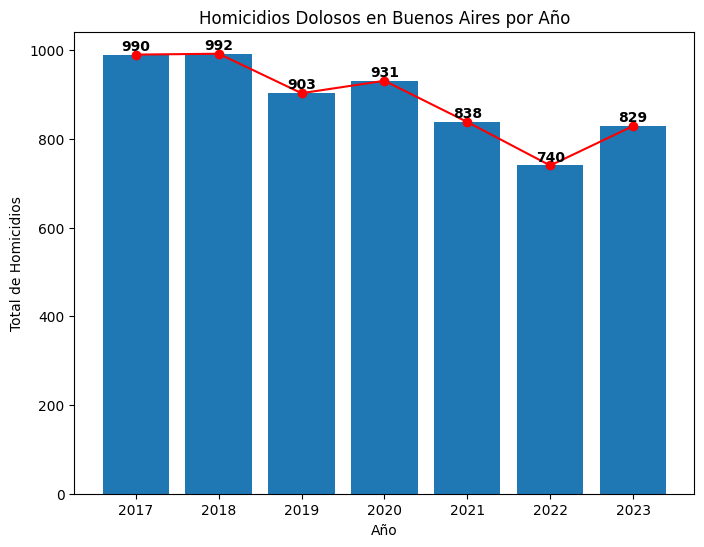

In [34]:
# Group data by year and count homicides
homicides_by_year = df_BA.groupby('anio')['id_hecho'].count().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(homicides_by_year['anio'], homicides_by_year['id_hecho'])
plt.xlabel('Año')
plt.ylabel('Total de Homicidios')
plt.title('Homicidios Dolosos en Buenos Aires por Año')
plt.xticks(homicides_by_year['anio'])  # Set x-axis ticks to show all years

# Add count values in bold on top of each bar
for i, v in enumerate(homicides_by_year['id_hecho']):
    plt.text(homicides_by_year['anio'][i], v + 10, str(v),
             ha='center', fontweight='bold')  # Adjust v + 10 for vertical position

# Connect the bars with a red line and red dots
plt.plot(homicides_by_year['anio'], homicides_by_year['id_hecho'],
         color='red', marker='o', linestyle='-')
plt.show()

Este gráfico es útil para comunicar de manera clara y concisa la disminución interanual de los Homicidios Dolosos por año en la Provincia de Buenos Aires (excepto en 2020 y 2023).
Veamos ahora en qué localidades de la Provincia de Buenos Aires ocurrieron los homicidios del año 2023.



In [35]:
# Group by year and department, then get distinct count
department_counts_by_year = df_BA.groupby(['anio', 'departamento_nombre'])['id_hecho'].count().reset_index()

# Pivot the table to have years as columns and departments as rows
table = department_counts_by_year.pivot(index='departamento_nombre', columns='anio', values='id_hecho')

# Fill NaN values with 0 and convert to integers
table = table.fillna(0).astype(int)  # Convert to integers here

# Calculate the total count for each department
table['Total'] = table.sum(axis=1)  # Sum across columns (years)

# Sort by the 'Total' column in descending order
table = table.sort_values(by='Total', ascending=False)

# Remove the 'Total' column if you don't want to display it
#table = table.drop(columns=['Total'])  # Optional

# Display the sorted table
print(table)

anio                 2017  2018  2019  2020  2021  2022  2023  Total
departamento_nombre                                                 
La Matanza            155   148   143   154   127   126   143    996
Moreno                 52    67    66    50    48    34    50    367
Lomas de Zamora        65    50    51    42    33    35    41    317
Quilmes                50    59    45    42    38    31    40    305
General Pueyrredón     36    48    46    33    39    32    43    277
...                   ...   ...   ...   ...   ...   ...   ...    ...
Lezama                  0     0     0     0     1     0     0      1
Saavedra                0     0     0     0     0     0     1      1
Salliqueló              0     0     0     0     1     0     0      1
Rivadavia               0     0     0     1     0     0     0      1
Tornquist               0     0     0     0     0     1     0      1

[125 rows x 8 columns]


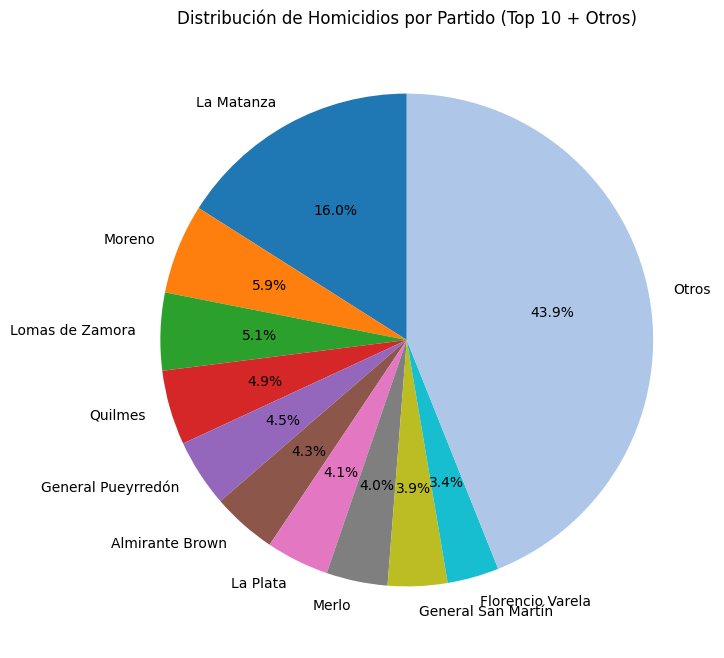

In [36]:
#considerando los primeros 10 partidos con más Homicidios dolosos de la Provincia,
#veamos como es la proporcion de los mismos, en el total del territorio bonaerense:

import matplotlib.pyplot as plt

# Get the top 10 departments and their counts
top_10_departments = table.head(10)  # Select the top 10 rows

# Calculate the sum of counts for the remaining departments
other_departments_count = table.iloc[10:, :].sum().sum()  # Sum counts from row 11 onwards

# Create labels for the pie chart
labels = top_10_departments.index.tolist() + ['Otros']  # Department names + 'Otros'

# Create data for the pie chart
sizes = top_10_departments.sum(axis=1).tolist() + [other_departments_count]  # Counts + 'Otros' count

# Define a color palette with 11 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8']  # Add more colors if needed

# Create the pie chart with the custom color palette
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Homicidios por Partido (Top 10 + Otros)')
plt.show()

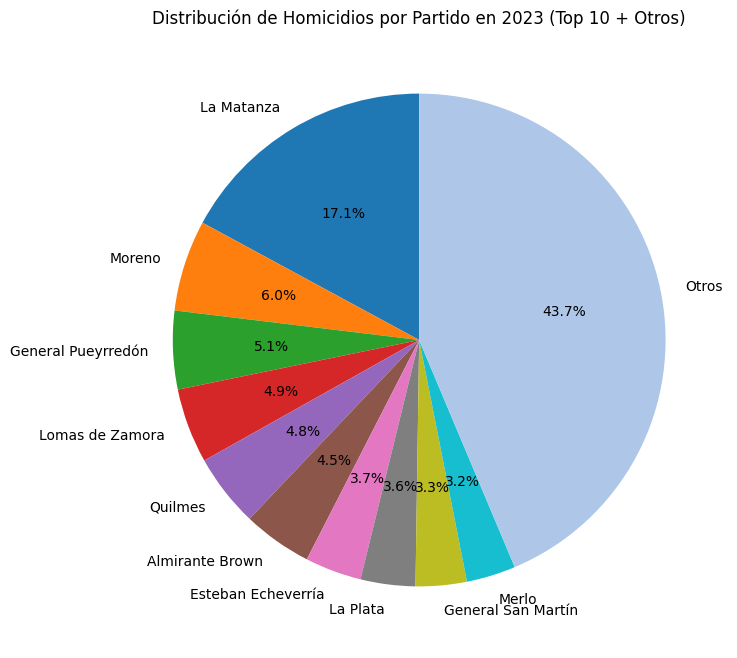

In [37]:
#veamos únicamente el año 2023 para ver si hay algun cambio sustancial en la proporcion de los Homicidios segun Partido:

import matplotlib.pyplot as plt

# Filter the table for the year 2023
table_2023 = table[[2023]]  # Select only the column for 2023

# Get the top 10 departments and their counts for 2023
top_10_departments_2023 = table_2023.sort_values(by=2023, ascending=False).head(10)

# Calculate the sum of counts for the remaining departments in 2023
other_departments_count_2023 = table_2023.iloc[10:, :].sum().sum()

# Create labels for the pie chart
labels_2023 = top_10_departments_2023.index.tolist() + ['Otros']

# Create data for the pie chart
sizes_2023 = top_10_departments_2023[2023].tolist() + [other_departments_count_2023]

# Define a color palette with 11 distinct colors (or adjust as needed)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8']

# Create the pie chart with the custom color palette
plt.figure(figsize=(8, 8))
plt.pie(sizes_2023, labels=labels_2023, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Homicidios por Partido en 2023 (Top 10 + Otros)')
plt.show()

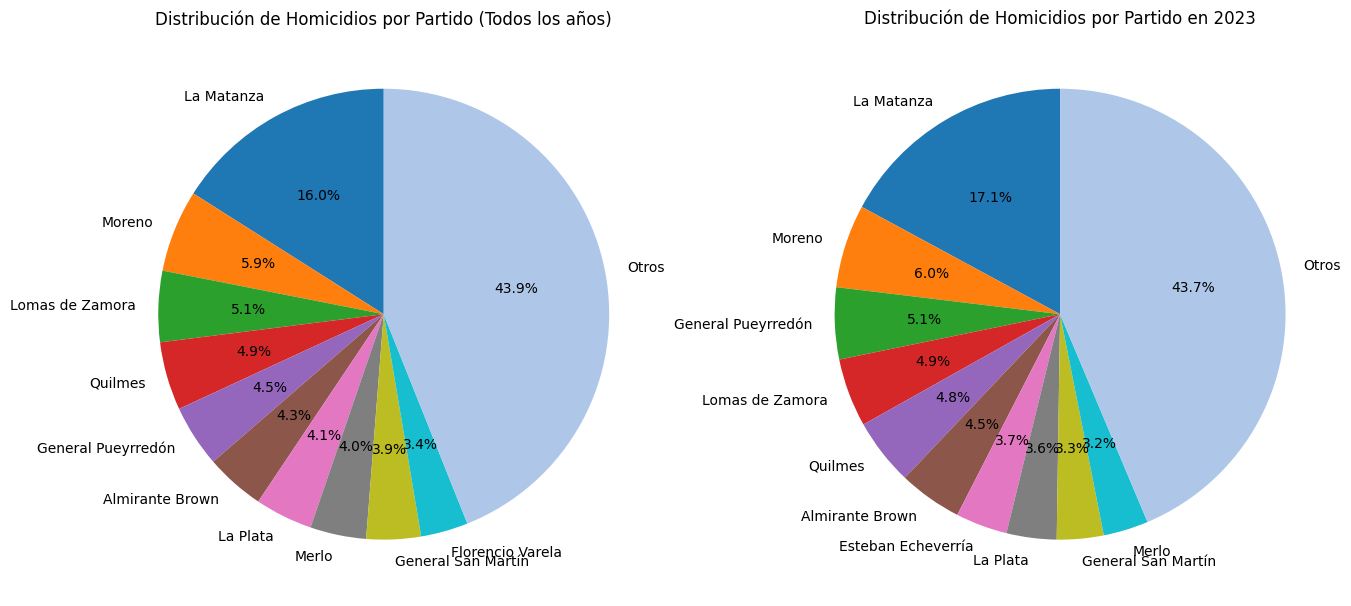

In [38]:
#veamolos uno al lado del otro para tener una mejor visualización:

import matplotlib.pyplot as plt

# pie total de los años 2017-2023

# Get the top 10 departments and their counts
top_10_departments = table.head(10)  # Select the top 10 rows

# Calculate the sum of counts for the remaining departments
other_departments_count = table.iloc[10:, :].sum().sum()  # Sum counts from row 11 onwards

# Create labels for the pie chart
labels = top_10_departments.index.tolist() + ['Otros']  # Department names + 'Otros'

# Create data for the pie chart
sizes = top_10_departments.sum(axis=1).tolist() + [other_departments_count]  # Counts + 'Otros' count

# Define a color palette with 11 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8']  # Add more colors if needed

#pie del año 2023
# Filter the table for the year 2023
table_2023 = table[[2023]]  # Select only the column for 2023

# Get the top 10 departments and their counts for 2023
top_10_departments_2023 = table_2023.sort_values(by=2023, ascending=False).head(10)

# Calculate the sum of counts for the remaining departments in 2023
other_departments_count_2023 = table_2023.iloc[10:, :].sum().sum()

# Create labels for the pie chart
labels_2023 = top_10_departments_2023.index.tolist() + ['Otros']

# Create data for the pie chart
sizes_2023 = top_10_departments_2023[2023].tolist() + [other_departments_count_2023]

# Define a color palette with 11 distinct colors (or adjust as needed)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8']

# Create subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Pie chart for all years
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribución de Homicidios por Partido (Todos los años)')

# Pie chart for 2023
ax2.pie(sizes_2023, labels=labels_2023, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución de Homicidios por Partido en 2023')

plt.show()

In [39]:
#pasemos a analizar el data set de acuerdo al Género de la Víctima, continuando el analisis dentro de la Provincia de Buenos Aires.
# Group data by year and victim's sex, then count homicides
homicides_by_year_sex = df_BA.groupby(['anio', 'victima_sexo'])['id_hecho'].count().reset_index()

# Rename the count column for better understanding
homicides_by_year_sex = homicides_by_year_sex.rename(columns={'id_hecho': 'total_homicidios'})

# Print the result
print(homicides_by_year_sex)

    anio victima_sexo  total_homicidios
0   2017     Femenino               148
1   2017    Masculino               842
2   2018     Femenino               145
3   2018    Masculino               847
4   2019     Femenino               147
5   2019    Masculino               756
6   2020     Femenino               139
7   2020    Masculino               792
8   2021     Femenino               104
9   2021    Masculino               734
10  2022     Femenino               121
11  2022    Masculino               619
12  2023     Femenino               129
13  2023    Masculino               700


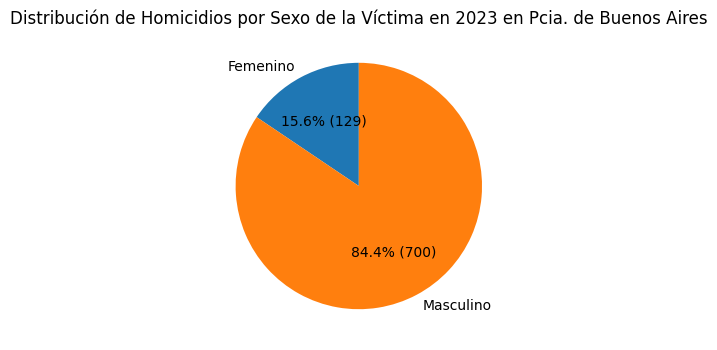

In [40]:
import matplotlib.pyplot as plt

# Filter data for the year 2023
data_2023 = homicides_by_year_sex[homicides_by_year_sex['anio'] == 2023]

# Get labels and values for the pie chart
labels = data_2023['victima_sexo']
values = data_2023['total_homicidios']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*sum(values))})', startangle=90)
plt.title('Distribución de Homicidios por Sexo de la Víctima en 2023 en Pcia. de Buenos Aires')
plt.show()

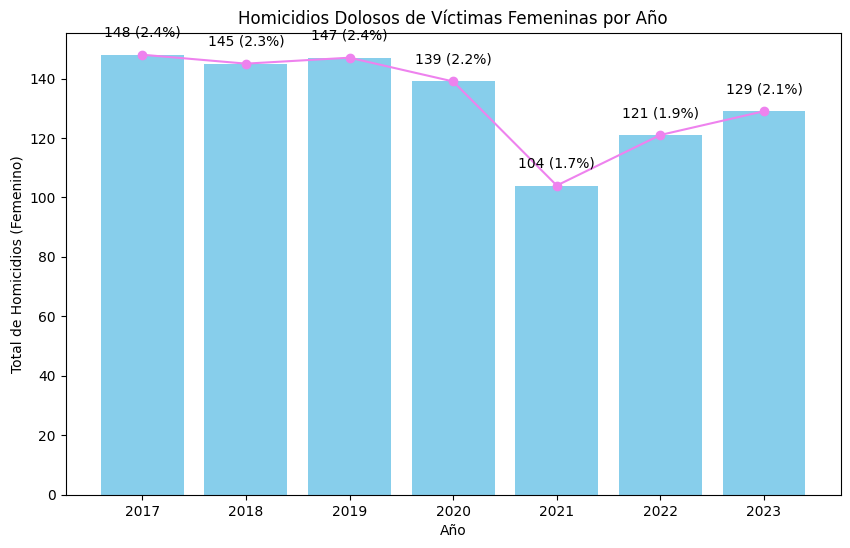

In [41]:
#analizaremos ahora la evolución de los Femicidios en la provincia de Buenos Aires


# Filter data for 'victima_sexo' == "Femenino"
female_homicides = homicides_by_year_sex[homicides_by_year_sex['victima_sexo'] == "Femenino"]

# Get total homicides for all years
total_homicides_all_years = homicides_by_year_sex['total_homicidios'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(female_homicides['anio'], female_homicides['total_homicidios'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Total de Homicidios (Femenino)')
plt.title('Homicidios Dolosos de Víctimas Femeninas por Año')
plt.xticks(female_homicides['anio'])

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_homicides_all_years) * 100  # Calculate percentage
    label_text = f'{int(height)} ({percentage:.1f}%)'  # Format label
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, label_text,
             ha='center', va='bottom')

# Connect the bars with a violet line
plt.plot(female_homicides['anio'], female_homicides['total_homicidios'],
         color='violet', marker='o', linestyle='-')

plt.show()

In [42]:
#Analicemos los femicidios por Partido en la Provincia de Buenos Aires
# Filter data for female victims
female_homicides_all_years = df_BA[df_BA['victima_sexo'] == "Femenino"]

# Group by department and count homicides
department_counts_female = female_homicides_all_years.groupby('departamento_nombre')['id_hecho'].count().reset_index()

# Rename the count column
department_counts_female = department_counts_female.rename(columns={'id_hecho': 'Total'})

# Sort by the 'Total' column in descending order
department_counts_female = department_counts_female.sort_values(by='Total', ascending=False)

# Display the table
print(department_counts_female)

   departamento_nombre  Total
50          La Matanza     85
51            La Plata     54
57     Lomas de Zamora     50
40  General Pueyrredón     46
63              Moreno     43
..                 ...    ...
77            Saavedra      1
74           Rivadavia      1
89            Tapalqué      1
93         Tres Lomas       1
97           Villarino      1

[99 rows x 2 columns]


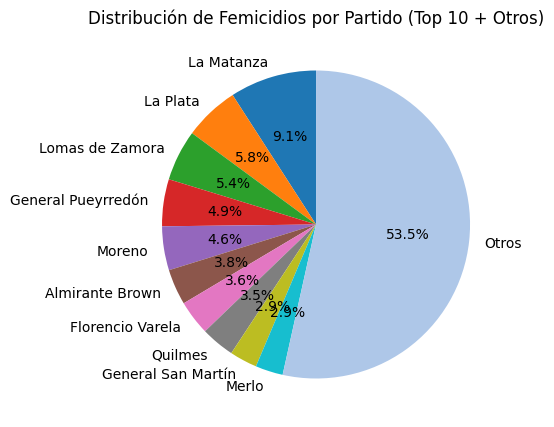

In [46]:
#top 10 de femicidios por partido

# Get the top 10 departments and their counts
top_10_departments = department_counts_female.head(10)

# Calculate the sum of counts for the remaining departments
other_departments_count = department_counts_female.iloc[10:]['Total'].sum()

# Create labels for the pie chart
labels = top_10_departments['departamento_nombre'].tolist() + ['Otros']

# Create data for the pie chart
sizes = top_10_departments['Total'].tolist() + [other_departments_count]

# Define a color palette with 11 distinct colors (or adjust as needed)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8']

# Create the pie chart with the custom color palette
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Femicidios por Partido (Top 10 + Otros)')
plt.show()

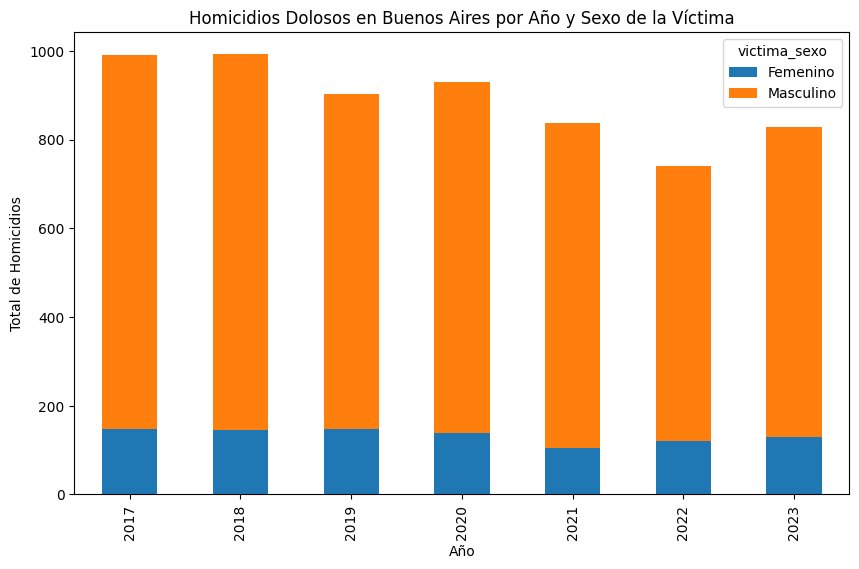

In [44]:
# Group data by year and victim's sex, then count homicides
homicides_by_year_sex = df_BA.groupby(['anio', 'victima_sexo'])['id_hecho'].count().reset_index()

# Pivot the table to have years as columns and victim's sex as rows
table_stacked = homicides_by_year_sex.pivot(index='anio', columns='victima_sexo', values='id_hecho')

# Create the stacked bar chart
table_stacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Total de Homicidios')
plt.title('Homicidios Dolosos en Buenos Aires por Año y Sexo de la Víctima')

# Connect the total homicides with a red line and red dots
total_homicides_by_year = table_stacked.sum(axis=1)  # Calculate total for each year
plt.plot(total_homicides_by_year.index, total_homicides_by_year.values,
         color='red', marker='o', linestyle='-')

plt.show()


In [ ]:
#ver la proporcion entre los 5 artistas mas mencionados en un grafico de torta usando Seaborn

# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

#  gráfico de torta
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(conteos, labels=artistas, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artistas Más Repetidos en la base de datos Spotify Song Attributes')
plt.show()

Si bien se advierte que el artista Drake es el principal del top 5, los 4 restantes no se encuentran sustancialmente muy alejados del primero. Es una distribucion bastante proporcional.

##Analizaremos al artista 'preferido' del autor del data set, poniendo el foco en las canciones de 'Drake'.

In [ ]:
#cuáles son las canciones del artista mas mencionado
canciones_drake = df_2[df_2['artist'] == 'Drake']['song_title']
print(canciones_drake)

Ahora analicemos de tales canciones dónde se concentran los valores de las mismas dentro de la categoria 'danceability':

In [ ]:
drake_danceability_df = df_2[df_2['artist'] == 'Drake'][['danceability']]
#print(drake_danceability_df)

plt.hist(drake_danceability_df['danceability'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Histograma de bailabilidad para las canciones de Drake')
plt.show()

Analizando el histograma de Danceability ´bailabilidad´ de las canciones de Drake se observa  una concentración de valores altos (hacia la derecha del gráfico), de modo que el insigh obtenido es que las canciones del artista Drake (de este data set) tienden a poseer un alto grado de bailabilidad.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Canciones de Drake
drake_songs = df_2[df_2['artist'] == 'Drake']

# Columnas deseadas para el gráfico
columnas_deseadas_grafico = ['acousticness', 'danceability', 'energy',
                     'liveness',   'speechiness',   'valence']

# Convierte la lista de Series en un DataFrame, seleccionando solo las columnas deseadas
drake_df = pd.DataFrame(drake_songs)[columnas_deseadas_grafico]

# Crea el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=drake_df)
plt.xticks(rotation=90, ha='right')
plt.title('Distribución de características para canciones de Drake')
plt.show()

Insights:
al comparar la distribución de las diferentes características se observa que la principal caracteristica de las canciones de Drake es que son bailables (mediana mas alta y rango pequeño) y en segundo lugar canciones energeticas (mediana alta).
No hay canciones representadas por puntos fuera de los bigotes que permitan Identificar canciones atípicas.
La dispersión de los datos en cada caja  da una idea de la variabilidad en cada característica del estilo musical de Drake. La caractiristica con valores mas bajos es 'acustico'.
En este gráfico de cajas se observa la concordancia con la caracteristica 'bailable'(es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos).

In [ ]:
#distribucion de las caracteristicas de las canciones del artista mas mencionado
drake_songs = df_2[df_2['artist'] == 'Drake']
import seaborn as sns
import matplotlib.pyplot as plt

columnas_deseadas = ['acousticness', 'danceability',  'energy', 'instrumentalness',
                     'liveness',  'mode', 'speechiness',   'valence']

# Calcula el promedio de cada característica
promedios_drake = drake_songs[columnas_deseadas].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios_drake.index, y=promedios_drake.values)
plt.xticks(rotation=90, ha='right')
plt.title('Valores promedio de características para canciones de Drake')
plt.ylabel('Valor promedio')
plt.xlabel('Característica')

plt.show()

en este grafico de barras (con los promedios de los valores de cada caracteristica) se puede interpretar conjuntamente con los dos graficos anteriores ( de histograma y el de barras). Con las tres clases de gráficos se infiere que la caracteristica 'bailable', es donde más se concentran los valores y donde se observan los valores mas altos y menos dispersos.

Ahora analizaremos las 16 canciones de Drake de acuerdo a las caracteristicas de 'acousticness', 'danceability', 'energy', 'liveness', y 'speechiness' usando grafico de radar.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Extrae los valores de las características para las canciones de Drake
drake_data = df_2[df_2['artist'] == 'Drake'][columnas_deseadas]

# Normaliza los valores entre 0 y 1
drake_data_norm = (drake_data - drake_data.min()) / (drake_data.max() - drake_data.min())

# Crea los ángulos para el gráfico de araña
angulos = np.linspace(0, 2*np.pi, len(columnas_deseadas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Cierra el círculo

# Crea una cuadrícula de subplots (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(polar=True))

# Itera sobre las canciones y crea los gráficos de radar
for i in range(len(drake_data_norm)):
    valores_cancion = drake_data_norm.iloc[i].values.tolist()
    valores_cancion += valores_cancion[:1]  # Cierra el círculo para cada canción

    # Obtén el título de la canción usando el índice
    titulo_cancion = df_2[df_2['artist'] == 'Drake']['song_title'].iloc[i]

    # Calcula la posición del subplot en la cuadrícula
    fila = i // 4
    columna = i % 4

    # Crea el gráfico de radar en el subplot correspondiente
    ax = axes[fila, columna]
    ax.plot(angulos[:-1], valores_cancion[:-1], 'o-', linewidth=2)
    ax.fill(angulos[:-1], valores_cancion[:-1], alpha=0.25)
    ax.set_thetagrids(angulos[:-1] * 180/np.pi, columnas_deseadas)
    ax.set_title(f'{titulo_cancion}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Al visualizar los 16 gráficos de radar de cada canción del artista Drake, se puede obtener informacion sobre la variabilidad de su estilo musical ya que los gráficos tienen formas muy diferentes entre sí.

Esto podría indicar que Drake experimenta con diferentes estilos musicales en sus canciones y donde la unica variable predominante  es 'bailable' ('danceability').

Las características predominantes en su música: la mayoría de las canciones de Drake tienen alta energía y bailabilidad. Podria afirmarse que su música es generalmente enérgica y bailable.

Canciones atípicas: el gráfico que se destaca del resto por tener una forma o valor muy diferente es el de la cancion 'Best I ever had' (por ser la unica cancion 'no bailale'. Esta cancion podría representar experimento musical o desviacion de su estilo habitual.

Siguiendo el correlato con los analisis realizados mediante los graficos anteriores (de barra e histograma) la caracteristica más observada para las canciones de Drake es 'bailabilidad'.

Teniendo en cuenta que la variable 'bailable' se repite en los análisis efectuados, ahora desearia saber dónde se concentran los datos haciendo un histograma para la base de datos en estudio. ¿será que al autor de la base de datos le suelen gustar canciones bailables en general? ¿o eso sólo sucede con las canciones del grupo Drake -su grupo con mayor cantidad de canciones en la base de datos-?. Veamos:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccion de las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Creacion del histograma
fig, axes = plt.subplots(1, len(columnas_deseadas), figsize=(15, 5))  # Crea subplots individuales
df_2[columnas_deseadas].hist(ax=axes, bins=20)

# Nuevos títulos
nuevos_titulos = ['Acustica', 'Bailable', 'Energico', 'Viviacidad', 'Canciones Habladas']

# Reemplazo los títulos de los gráficos
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(nuevos_titulos[i])

plt.suptitle('Histogramas de Características del data set Spotify Song Attributes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede inferir que, lo que sucede con las canciones de Drake tambien se replica para la mayoria de las canciones de la base de datos. Es decir que el autor de este data set tiende a preferir canciones bailables y enérgicas, con bajos valores para canciones acústicas, y habladas.

Veamos ahora si esto mismo sucede respecto de los 5 artistas más repetidos en la base de datos, que ya habiamos obtenido más arriba: artistas_top_5 = ['Drake', 'Rick Ross', 'Disclosure', 'Walk the Moon', 'Backstreet Boys']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Artistas más repetidos (top 5)
artistas_top = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas_top)]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist', y='danceability', data=df_filtrado)
plt.xticks(rotation=90, ha='right')
plt.title('Comparación de Danceability entre los Artistas top 5')
plt.xlabel('Artistas')
plt.ylabel('Danceability')
plt.show()

Al comparar la mediana, los cuartiles y los valores atípicos de 'danceability' entre los artistas top 5, se observa variabilidad en el nivel de bailabilidad de sus canciones. Por lo tanto, si bien el autor tiene una tendencia hacia las canciones bailables considerando TODA la base de datos, cuando se focaliza en los 5 artitas más repetidos, la caracteristica bailable varia entre 0.8 (valor máximo para 'Drake') a 0,45 (valor mínimo: para 'Walk The Moon').

Veamos el detalle de 'danceability' y 'energy' en un grafico de barras agrupadas para los 5 artistas más repetidos. Esto  permite visualizar la cantidad de canciones, así como los valores promedio de 'danceability' y 'energy' para cada artista.



In [12]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones - ancho_barra, conteos, width=ancho_barra, label='Cantidad de Canciones')
ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: Canciones, Danceability y Energy')
ax.legend()

NameError: name 'top_5_artists_series' is not defined

se advierte que el gráfico de barras agrupadas no es el mejor para evidenciar la diferencia apuntada en la conclusion anterior, (respecto a los valores promedio de 'danceability' y 'energy' para cada artista) ya que la columna de cantidad de canciones impide ver la variacion entre los artistas respecto de las variables bajo analisis. dicho en otras palabras, el gráfico NO  evidencia la conclusión anteriormente desarrollada. Intentemos hacer uno nuevo SIN la columna Cantidad de Canciones:

In [ ]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: analisis de Danceability y Energy')
ax.legend()

Con el gráfico anterior se vuelve a evidenciar que los valores Danceability y Energy'(para el Top 5 de Artistas más Repetidos) son elevados y se muestra de mejor modo la diferencia de valores entre cada uno de ellos.


#### ¿Como influye la variable Duración ('duration_ms') en el data set respecto de la caracteristica 'danceability'?
Ya hemos analizado cuáles son los artitas favoritos del autor del data set y que la característica distintiva de la base de datos y del artista favorito tiende a ser 'dancecability'.
Indaguemos seguidamente si hay relación entre la variable 'danceability' y la duración de las canciones que posee el data set.
Primero analizaremos usando el método describe de la columna 'duration_ms', teniendo en cuenta que la duración de las canciones del data set están expresadas en milisegundos.

In [ ]:
#repitamos el metodo describe
df_2.describe().round()

In [ ]:
#variable Duration_ms
df_2['duration_ms'] = df_2['duration_ms'].round(2)  # redondear a 2 decimales
descripcion_duracion = df_2['duration_ms'].describe(). round(2)
print(descripcion_duracion)

El tiempo expresado en milisegundos debe ser convertido a minutos para poder ser comprendido:

In [ ]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)  # Divide milisegundos (1000 * 60) para obtener minutos
descripcion_duracion = df_2['duration_min'].describe(). round(2)
print(descripcion_duracion)

Ahora vemos los datos más importantes del data set segun la duración en min:
la cancion más corta (0,27 min)
la cancion más extensa (16.74 min)
la duración promedio (4.11 min).
Vemos que la desviación estandar es de 1.37 minutos:
significa que aproximadamente el 68% de las canciones en el data set tienen duraciones dentro de 1.37 minutos por encima o por debajo de la duración promedio.
Alrededor del 95% de las canciones caen dentro de dos desviaciones estándar (2 * 1.37 = 2.74 minutos) de la media.
Casi todas (99.7%) de las canciones están dentro de tres desviaciones estándar (3 * 1.37 = 4.11 minutos) de la duración promedio.

In [ ]:
# Encontrar el indice de la fila con la menor duración en minutos
index_min = df_2['duration_min'].idxmin()

# Encontrar el indice de la fila con la mayor duración en minutos
index_max = df_2['duration_min'].idxmax()

# obtener ahora el titulo de la canción, la duración y el artista correspondiente a tales índices
song_min = df_2.loc[index_min, 'song_title']
duration_min = df_2.loc[index_min, 'duration_min']
artist_min = df_2.loc[index_min, 'artist']

song_max = df_2.loc[index_max, 'song_title']
duration_max = df_2.loc[index_max, 'duration_min']
artist_max = df_2.loc[index_max, 'artist']


print(f"La canción con la menor duracion es: '{song_min}', interpretada por el artista: '{artist_min}' con una duración de {round(duration_min,2)} minutos)")

print(f"La canción con la mayor duracion es: '{song_max}', interpretada por el artista: '{artist_max}' con una duración de {round(duration_max,2)} minutos)")

Ya vimos cuál es la canción más extensa, la más corta, la duración promedio y algo acerca de la desviación estandar de la duración. Ahora podríamos representarlo en un histograma: ¿dónde se concentran la mayoría de las canciones de la base de datos dentro de 'duración'?(expresado ahora en Minutos y no en Milisegundos)

In [ ]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_2['duration_min'], bins=20)
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de las canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()


Promedio de duración de las canciones del data set:

In [ ]:
promedio_duracion_minutos = df_2['duration_min'].mean()
promedio_redondeado = round(promedio_duracion_minutos, 2)
print('El promedio de las canciones del data set es de \033[1m\033[3;35m', promedio_redondeado, '\033[0m minutos.')

Vemos que el resultado del cálculo promedio es consecuente con el gráfico de histograma. Ahora veamos lo mismo pero mediante un gráafico de Cajas

In [ ]:
import matplotlib.pyplot as plt

# Calcular los límites del eje x
min_valor = df_2['duration_min'].min()
max_valor = df_2['duration_min'].max()

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['duration_min'], vert=False, patch_artist=True)
plt.xlabel('Duración en minutos')
plt.title('Gráfico de cajas de duración de canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)


# Ajustar los límites del eje x
plt.xlim(min_valor - 0.1, max_valor + 0.1)  # Ajusta los valores -0.5 y +0.5 según sea necesario

plt.show()


Con este gráfico de cajas de la duración de las canciones, se puede  analizar varios aspectos de la distribución de los datos del data set:

1. Mediana: La línea dentro de la caja representa la mediana, es decir, el valor que divide la distribución en dos mitades iguales. Demuestra dónde se encuentra la duración típica de las canciones en el dataset. (cercana a los 4 minutos)

2. Cuartiles: Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3). Estos valores dividen la distribución en cuatro partes iguales. La distancia entre Q1 y Q3 (el rango intercuartil)  indica la dispersión de la mitad central de los datos.

3. Rango: Las líneas que se extienden desde la caja (bigotes) muestran el rango de los datos, excluyendo posibles valores atípicos. Se puede observar la duración mínima y máxima de las canciones dentro de este rango.

4. Valores atípicos: Los puntos individuales fuera de los bigotes representan posibles valores atípicos, es decir, canciones con duraciones inusualmente largas o cortas en comparación con el resto de la distribución.

Veamos ahora cómo quedaria representado mediante el método de puntuación z el gráfico de cajas:

##Diagrama de caja de puntuaciones Z

In [13]:
from scipy import stats
df_2['z_score_duration'] = stats.zscore(df_2['duration_min'])

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['z_score_duration'], vert=False, patch_artist=True)
plt.xlabel('Z-score de Duración')
plt.title('Gráfico de cajas de duración de canciones (Z-scores)')
plt.show()

NameError: name 'df_2' is not defined

Al calcular las puntuaciones z, se transforman los valores de 'duration_min' en una distribución normal estándar con una media de 0 y una desviación estándar de 1.

Esto permite identificar valores atípicos en función de cuántas desviaciones estándar están lejos de la media.

El diagrama de caja de puntuaciones z representa visualmente la distribución de estos valores estandarizados, lo que facilita la identificación de posibles valores atípicos. En este caso los que estan por debajo de -2 y los que se hallan mas alla de 4.

####Combinación de variables analizadas hasta ahora.
Ya analizamos en la primer parte las caracteristicas de las canciones y descubrimos la preponderancia de las características 'danceability' y 'energy'.

Seguidamente analizamos acerca de la duración de las canciones.

Ahora veamos cuál es la correlación entre tales variables entre sí representándolas mediante graficos de dispersión.

##Gráfico de dispersión: Duración y Danceability




In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['danceability'])
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos ahora como quedaria representado en un gráfico de dispersión de puntos respecto de la variable 'Energy'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['energy'], color='red')
plt.xlabel('Duración en minutos')
plt.ylabel('Energy')
plt.title('Gráfico de dispersión: Duración y Energy')

# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos las dos representaciones juntas usando subplots en Matplotlib. Lo que permitirá crear dos gráficos en una misma figura. Esto permite una comparación visual directa entre las dos relaciones.

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Crea dos subplots en una fila

# Gráfico 1: Duración vs. Danceability
ax1.scatter(df_2['duration_min'], df_2['danceability'])
ax1.set_xlabel('Duración en minutos')
ax1.set_ylabel('Danceability')
ax1.set_title('Duración y Danceability')


# Aplica las marcas al eje x
plt.xticks(marcas_x)
# Gráfico 2: Duración vs. Energy
ax2.scatter(df_2['duration_min'], df_2['energy'], color='red')
ax2.set_xlabel('Duración en minutos')
ax2.set_ylabel('Energy')
ax2.set_title('Duración y Energy')

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

Insights:


*   Duración y Bailabilidad
Se observa una concentración de canciones bailables (de 0.5 a 0.8) con una duracion aprox. de 4 min.

*   Duración y Energía
Se observa una concentración de canciones energicas (de 0.6 a 10) con una duracion aprox. de 4 min.


Ahora veamos cuál es la influencia de la variable 'energy' en la variable 'danceability' dentro de un solo gráfico (donde la relación entre la duración y 'danceability' se representa mediante la posición de los puntos, y la variable 'energy' se mapea al color de los puntos).
Esto permite visualizar la influencia de 'energy' en la relación entre duración y 'danceability' en un solo gráfico.
Veamos:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_2['duration_min'], df_2['danceability'], c=df_2['energy'], cmap='viridis')
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
plt.colorbar(label='Energy')  # Agrega una barra de colores para mostrar la escala de 'energy'
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1  # Suma 1 para incluir el máximo en el rango

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Aqui podemos observar que la mayoria de las canciones con altos niveles de danceability tienen una duracion semejante al promedio de las canciones del data set (3,75 / 4 Min.). Y que el valor 'energy' que más influye se encuentra entre 0,6 y 0,8.


# OBJETIVO n°2

  

>  Intentar crear un algoritmo que prediga qué canciones le gustarán al autor del data set.

####A fines de poder abordar el objetivo n° 2 respecto de la base de datos 'Atributos de las canciones de Spotify' debemos hacer una matriz de correlacion con los valores numéricos seleccionando las siguientes columnas: 'acousticness', 'danceability', 'duration_ms', 'energy',            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness' y 'valence'.

In [ ]:
#indagar sobre la existencia de valores outliers:

# Representarlas de a 4 graficos
n_rows = int(np.ceil(len(df_selected.columns) / 4))

# Crear una figura con todos los box plots
plt.figure(figsize=(15, 6 * n_rows))

# creacion de  box plots para cada columna
for i, column in enumerate(df_selected.columns):
  plt.subplot(n_rows, 4, i + 1)  # n_rows rows, 4 columns
  sns.boxplot(x=df_selected[column])
  plt.title(column)

plt.tight_layout()
plt.show()

Se observa la existencia de valores outliers.

In [ ]:
# manejo de outliers
#usaré 2 métodos: IQR y z-score

def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

# Columnas seleccionadas:
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

# Calcuar la matriz de correlacion sin eliminar outliers
correlation_matrix1 = df_selected.corr()

# Remover outliers usando IQR
index_list = []
for feature in df_selected:
    index_list.extend(outliers(df_selected, feature))
df_selected_cleaned = remove(df_selected, index_list)
correlation_matrix2 = df_selected_cleaned.corr()

# Remover outliers usando z-score
z = np.abs(stats.zscore(df_selected))
df_selected_filtered = df_selected[(z < 3).all(axis=1)]
correlation_matrix3 = df_selected_filtered.corr()

# Creacion de Subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Heatmap 1: Sin Remover outliers
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Sin eliminar outliers')
axes[0].tick_params(axis='x', rotation=90)

# Heatmap 2: Eliminando outliers con IQR'
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Eliminando outliers con IQR')
axes[1].tick_params(axis='x', rotation=90)

# Heatmap 3: Eliminando outliers con z-score
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Eliminando outliers con z-score')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#Outliers

A partir de la escala cromática de las tres imagenes que anteceden, y comparando los mapas de calor *con y sin eliminación de outliers*, se observa que **la eliminación de valores atípicos mediante Z-score o IQR no mejora la correlación entre las variables.**

Esto puede deberse a que los valores atípicos eliminados contienen información relevante para el análisis.

Por lo tanto, en este caso, no es recomendable eliminar los outliers, ya que no se obtiene una mejora en la correlación entre las variables.

Se puede inferir que los valores atípicos son parte de la variabilidad natural de los datos y que su eliminación puede llevar a la pérdida de información importante.

Ahora bien, pasando al analisis del mapa de calor definitivo: (sin la eliminación de valores outliers), **se puede deducir que no hay pares de atributos
que tengan una fuerte correlación lineal  (mayor a 0,8 o menor a -0,8)**, lo cual sugiere que cada
atributo aporta información única y no redundante.

#Feature Selection




###Tasa de ganancia de información para cada atributo.

Ahora pasemos a determinar el peso de los atributos a partir de su tasa de ganancia de información:

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Columnas seleccionadas (las mismas que se usaron para la matriz de correlacion)
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

#  'target' is the target variable column in df_2
X = df_selected
y = df_2['target']

# Calculate information gain for each feature
information_gain = mutual_info_classif(X, y)

# Print information gain for each feature
for i, feature in enumerate(X.columns):
    print(f'Tasa de ganancia de información para {feature}: {information_gain[i]}')

In [14]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Select desired columns
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

X = df_selected
y = df_2['target']

# Calculate information gain
information_gain = mutual_info_classif(X, y)

# Sort features by information gain in descending order
indices = np.argsort(information_gain)[::-1]
sorted_features = X.columns[indices]
sorted_information_gain = information_gain[indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_information_gain)
plt.xticks(rotation=90)
plt.ylabel('Información de Ganancia')
plt.title('Información de Ganancia según los Atributos')
for i, v in enumerate(sorted_information_gain):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom') # format to 4 decimal places
plt.show()

NameError: name 'df_2' is not defined

El gráfico indica que los atributos más relevantes para predecir la etiqueta de las canciones  son:
1. loudness (0.0520)
2. danceability (0.0386)
3. duration_ms (0.0370)
4. instrumentalness (0.0370)
5. acousticness (0.0290)


###Ingeniería de Fatores
Antes de pasar a la creacion de los modelos repasemos cómo estan estructurados los datos del data set (llamado df_2)

In [ ]:
#el df_2 original posee TODOS LOS ATRIBUTOS incluso los valores que no sirven para hacer la prediccion tales como 'song_title'y 'artist'
# los atributos numericos de interes son:
                     #'acousticness', 'danceability', 'duration_ms', 'energy',
                     #'instrumentalness', 'key', 'liveness', 'loudness',
                     #'mode', 'speechiness', 'valence'

#los 5 atributos con mas peso 'Tasa de ganancia' son:
                    #loudness (0.0520), danceability (0.0386), duration_ms (0.0370),
                    #instrumentalness (0.0370), y acousticness (0.0290)


#Feature Selection:

ya vimos que los atributos más relevantes para predecir la etiqueta (1 o 0) de las canciones son:
1. loudness (0.0520)
2. danceability (0.0386)
3. duration_ms (0.0370)
4. instrumentalness (0.0370)
5. acousticness (0.0290).

---

Este insight lo tendremos en cuenta para reducir la dimensionalidad del dataset y ser usado más adelante con la finalidad de optimizar el rendimiento del modelo que mejor funcione.

Tambien vimos que el problema a resolver es una variable objetivo 0 y 1 ('target'). Por lo tanto debemos usar metodos de clasificacion supervisados (ya que el valor a predecir es 1 y 0 segun si la canción le gusta o no al autor del data set).

# Balance del data set

In [ ]:
#veamos si el data set es equilibrado:

# Calcular cuantas veces aparece cada target
sum_0 = df_2[df_2['target'] == 0]['target'].count()
sum_1 = df_2[df_2['target'] == 1]['target'].count()

# Creacion grafico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Target 0: No le gusta', 'Target 1: Le gusta'], [sum_0, sum_1], color=['blue', 'orange'])
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones por Target')

# agregar etiquetas a las columnas
for i, v in enumerate([sum_0, sum_1]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Creacion grafico de torta
plt.figure(figsize=(6, 6))
plt.pie([sum_0, sum_1], labels=['Target 0: No le gusta', 'Target 1: Le gusta'], autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('Distribución de canciones según Target')

plt.show()

Se advierte que la distribución entre las canciones que le gustan de las que no, dentro del data set es muy paritaria.

# **Modelos**
Teniendo en cuenta que mi problema es de clasificacion binaria (predecir si al autor del data set le gusta o no una canción) usaré los siguientes modelos:
  

1.   "GNB": GaussianNB
2.  "LGBM": LGBMClassifier
3."KNN": KNeighborsClassifier,
4."DT": DecisionTreeClassifier,
5. "LRC": LogisticRegression,
6."RFC": RandomForestClassifier,
7. "XGB": XGBClassifier

dividiré la muestra en dos subconjuntos: el de entrenamiento y el de testeo, con una proporción respecto a la muestra total de un 80 y un 20% respectivamente.
    
    
    
    
    
    

In [ ]:
# Definicion de modelos
models = {
    "GNB": GaussianNB(),
    "LGBM": LGBMClassifier(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "LRC": LogisticRegression(),
    "RFC": RandomForestClassifier(),
    "XGB": XGBClassifier()
}

# preparacion de la data: usando random state de 42 y division del data set en 80% y 20%
X = df_2[df_selected.columns]  # Usando el df_2 pero con las columnas de df_selected
y = df_2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creacion de diccionario para almacenar los resultados
results = {}

# crear  subplots para poder comparar las matrices de confusión
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Iteracion sonbre los modelos
for i, (model_name, model) in enumerate(models.items()):
    # entrenamiento y prediccion
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculo de métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # almacenamiento de resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión - {model_name}')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')

# esconder el ultimo subplot  por ser menos de 8 modelos
if len(models) < 8:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Creacion de un DataFrame de los resultados almacenados en el diccionario
results_df = pd.DataFrame.from_dict(results, orient='index')

# destacar valores minimos y maximos para facilitar la lectura
def highlight_min_max(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: red' if v else ('background-color: green' if w else '') for v, w in zip(is_min, is_max)]

# aplicar el resaltado en el data frame
styled_results_df = results_df.style.apply(highlight_min_max)

# mostrar el DataFrame para comparar los resultados
display(styled_results_df)

# Optimización del método "XGB" (XGBoost)

Teniendo en cuenta las distintas matrices de confusion y la tabla de valores con las distintas métricas para los métodos aplicados, se visualiza que los modelos **RFC** (Random Forest), **XGB** (XGBoost) y **LGBM** (LightGBM) son los que muestran un mejor rendimiento en términos de equilibrio entre precisión y recall, así como un buen F1-score.

+ Sin embargo, analizando estos 3 modelos en sus respectivas matrices de confusion, se advierte que **XGB** (XGBoost) fue el que más aciertos tuvo al predecir los resultados, con que los valores más bajos de falsos negativos y falsos positivos.

+ Intentemos optimizar dicho modelo, comparándolo con los
atributos que más peso tienen respecto de la variable objetivo ('target').
Vale recordar que los atributos más pesados resultan ser: 'loudness', 'danceability','duration_ms','instrumentalness' y 'acousticness'.


In [ ]:

df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence', 'target']]

df_selected_5 = df_2[['loudness', 'danceability','duration_ms','instrumentalness', 'acousticness','target']]


# Definición de modelo
model = XGBClassifier()


# Definición de dataframes
dfs = {
    "df_selected": df_selected,
    "df_selected_5": df_selected_5
}

# creacion de diccionario para almacenar los resultados obtenidos
results = {}

# Creacion de subplots para las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#  Definición de titulos para las matrices de confusión
titles = [
    "Matriz de Confusión usando todos los atributos",
    "Matriz de Confusión usando los 5 atributos más pesados"
]
# Iteración sobre dataframes
for i, (df_name, df) in enumerate(dfs.items()):
    X = df.drop('target', axis=1)  # haciendo Drop sobre 'target'
    y = df['target']               # usando la columna 'target' del actual DataFrame
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # entrenamiento y predicción
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # cálculo de las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # almacenar los resultados
    results[df_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(titles[i]) #usando los titulos preestablecidos
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

# Creación de un DataFrame con los resultados del diccionario
results_df = pd.DataFrame.from_dict(results, orient='index')

# renombrar indices
new_indices = {
    "df_selected": "Con todos los atributos",
    "df_selected_5": "Con los 5 atributos más pesados"
}
results_df = results_df.rename(index=new_indices)

# Resaltar valores  min y  max
def highlight_min_max(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: red' if v else ('background-color: green' if w else '') for v, w in zip(is_min, is_max)]

# Aplicar el resaltado de los valores
styled_results_df = results_df.style.apply(highlight_min_max)

# Mostrar el DataFrame
display(styled_results_df)

# Análisis de los resultados obtenidos:
Comparando el rendimiento del modelo usando todos los atributos frente a usar solo los 5 atributos más importantes, se pueden sacar las siguientes conclusiones:

**Rendimiento con todos los atributos**:

Accuracy: 0.779703

Precision: 0.776650

Recall: 0.772727

F1-score: 0.774684

**Rendimiento con los 5 atributos más importantes**:

Accuracy: 0.698020

Precision: 0.691919

Recall: 0.691919

F1-score: 0.691919


---
+ Rendimiento con los 5 atributos más importantes:

Aunque se ha reducido el número de atributos a solo los 5 más importantes, *el rendimiento del modelo disminuye considerablemente*. El F1-score baja de 0.774684 a 0.691919, lo que indica que al reducir los atributos, el modelo pierde capacidad de generalización.

+ Tanto la precisión como el recall se ven afectados negativamente al utilizar solo los 5 atributos más importantes.

Esto indica que, aunque esos 5 atributos pueden ser muy informativos, la exclusión de los otros reduce la capacidad del modelo para hacer predicciones precisas y consistentes.



---


Posibles explicaciones por las que el modelo con menos atributos puede tener un peor rendimiento:

**Pérdida de información**: Al eliminar atributos, se pierde información que podría ser útil para la predicción. Aunque los atributos eliminados tengan un peso menor, pueden aportar información complementaria que mejore la precisión del modelo.

**Overfitting**: Un modelo con menos atributos puede ser más propenso al overfitting, es decir, a ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos.

# **COMPARACIÓN DE MODELOS**
Hemos usado los siguientes algoritmos:

1. DT ('Árbol de Decisión')
2. LRC ('Regresión Logística')
3. KNN ('K-nearest Neighbours Classifier')
4. GNB ('Gaussian Naive bayes classifier')
5. LGB ('Gaussian Naive bayes classifier')
6. RFC ('Random forest Classifier')
7. XGB ('XGBOOST')


Teniendo en cuenta que los mejores resultados fueron los obtenidos para el modelo XBG, se intentó opimizarlo usando únicamente los atributos con más peso respecto de la variable objetivo.





# **CONCLUSIÓN FINAL DEL TRABAJO:**

### Comparación de los Modelos

1. **Gaussian Naive Bayes (GNB)**:
   - **Accuracy**: 0.608911
   - **Precision**: 0.617647
   - **Recall**: 0.530303
   - **F1-score**: 0.570652

GNB muestra un rendimiento bastante bajo, con problemas para captar correctamente las clases positivas (bajo recall).

2. **LightGBM (LGBM)**:
   - **Accuracy**: 0.767327
   - **Precision**: 0.760000
   - **Recall**: 0.767677
   - **F1-score**: 0.763819
  
LGBM es uno de los mejores modelos, con un buen balance entre precisión y recall. Esto indica que es eficaz para clasificar si una canción le gusta o no.

3. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 0.561881
   - **Precision**: 0.551220
   - **Recall**: 0.570707
   - **F1-score**: 0.560794

El rendimiento del KNN es pobre, con bajos valores en todas las métricas, lo que sugiere que no es adecuado para resolver problema.

4. **Decision Tree (DT)**:
   - **Accuracy**: 0.700495
   - **Precision**: 0.687805
   - **Recall**: 0.712121
   - **F1-score**: 0.699752

DT tiene un rendimiento decente, pero es superado por modelos más complejos como LGBM y XGBoost.

5. **Logistic Regression (LRC)**:
   - **Accuracy**: 0.490099
   - **Precision**: 0.490099
   - **Recall**: 1.000000
   - **F1-score**: 0.657807

LRC presenta una anomalía con un recall perfecto pero una precisión y accuracy muy bajos, lo que sugiere sobreajuste o un desequilibrio en las clases.

6. **Random Forest Classifier (RFC)**:
   - **Accuracy**: 0.762376
   - **Precision**: 0.750000
   - **Recall**: 0.772727
   - **F1-score**: 0.761194

RFC es uno de los modelos más consistentes, con métricas muy equilibradas y un buen rendimiento general.

7. **XGBoost (XGB)**:
   - **Accuracy**: 0.779703
   - **Precision**: 0.776650
   - **Recall**: 0.772727
   - **F1-score**: 0.774684
   
XGB es el mejor modelo en términos de rendimiento general, con el mayor accuracy y F1-score. Su balance entre precisión y recall es excelente.

### ¿Se Logró el Objetivo n° 2?



> El objetivo de crear un modelo que pueda predecir si al autor del data set le gustará o no una canción **se ha logrado parcialmente**. Si bien el algoritmo XGB dá respuesta al objetivo planteado de predecir si una cancion le gustará o no al autor del data set, no se alcanzan valores optimos. Ello evidencia que el autor del data set no tiene un gusto musical muy marcado.


Modelos como **XGBoost**, **LGBM** y **Random Forest** muestran buenos resultados en cuanto a precisión y recall, lo que indica que pueden hacer predicciones bastante acertadas. Sin embargo, otros modelos como **GNB**, **KNN** y **LRC** no son adecuados para este problema debido a su bajo rendimiento.

### Conclusión Final

1. **Modelos más efectivos**:
   - Los mejores modelos son **XGBoost**, **LGBM** y **Random Forest**, ya que ofrecen un buen balance entre precisión y recall, lo que asegura que las predicciones sobre si una canción gusta o no son confiables.

2. **Modelos menos efectivos**:
   - **GNB**, **KNN** y **LRC** no son efectivos y deberían evitarse o mejorar significativamente. LRC en particular tiene un comportamiento anómalo que sugiere problemas con los datos o el modelo.

### Posibles Mejoras

1. **Optimización de Modelos**:
   - **XGBoost**, **LGBM** y **Random Forest** se pueden mejorar aún más mediante técnicas de optimización de hiperparámetros como GridSearchCV o RandomizedSearchCV para afinar el rendimiento.
   
2. **Nuevo planteo del problema**:
  - A futuro podría establecerse una meta distinta sobre la que no pese demasiado la subjetividad propia del autor del data set, e indagar sobre atributos más objetivos.